In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pyt
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import MinMaxScaler


##### First we make a dataframe using the datas given for our project

In [193]:
df=pd.read_csv('Customer Conversion Prediction - Customer Conversion Prediction.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [194]:
df['mon'].isnull().sum()

0

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [196]:
df=df.replace('unknown',np.nan)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             44923 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  43354 non-null  object
 4   call_type       32191 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    8252 non-null   object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [198]:
df['job'].mode()

0    blue-collar
Name: job, dtype: object

In [199]:
df['prev_outcome'].isna().sum()

36959

In [200]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

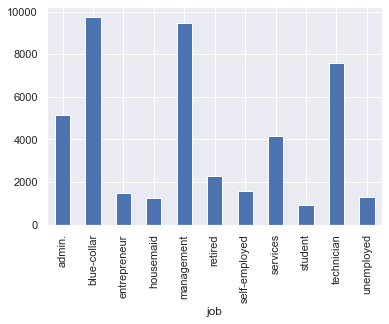

In [201]:
%matplotlib inline
dj=df.groupby('job')['job'].count().plot(kind='bar')                                                                                                   


In [202]:
df['job'].isna().sum()

288

In [203]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

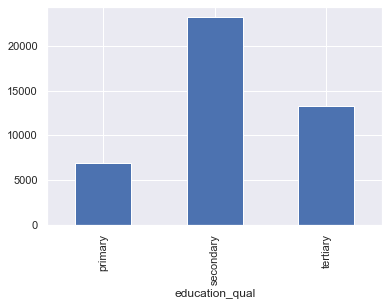

In [204]:
dj=df.groupby('education_qual')['education_qual'].count().plot(kind='bar')  

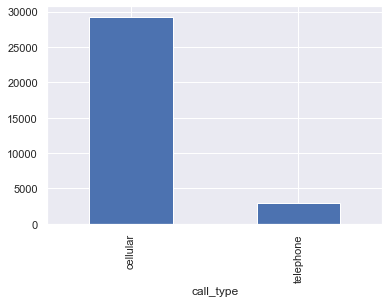

In [205]:
dj=df.groupby('call_type')['call_type'].count().plot(kind='bar')  

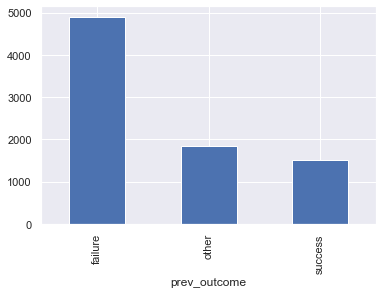

In [206]:
dj=df.groupby('prev_outcome')['prev_outcome'].count().plot(kind='bar')


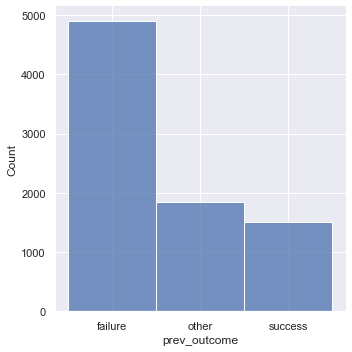

In [207]:
sns.displot(df['prev_outcome'])

# let fill the 'job' column

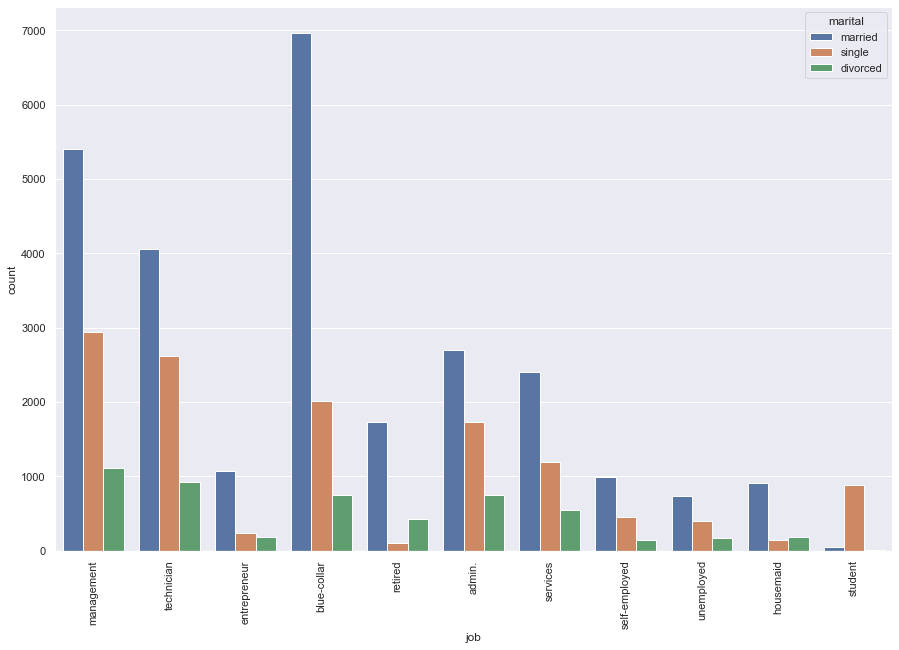

In [208]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='job',hue='marital',data=df)
pl.tick_params(axis='x',rotation=90)

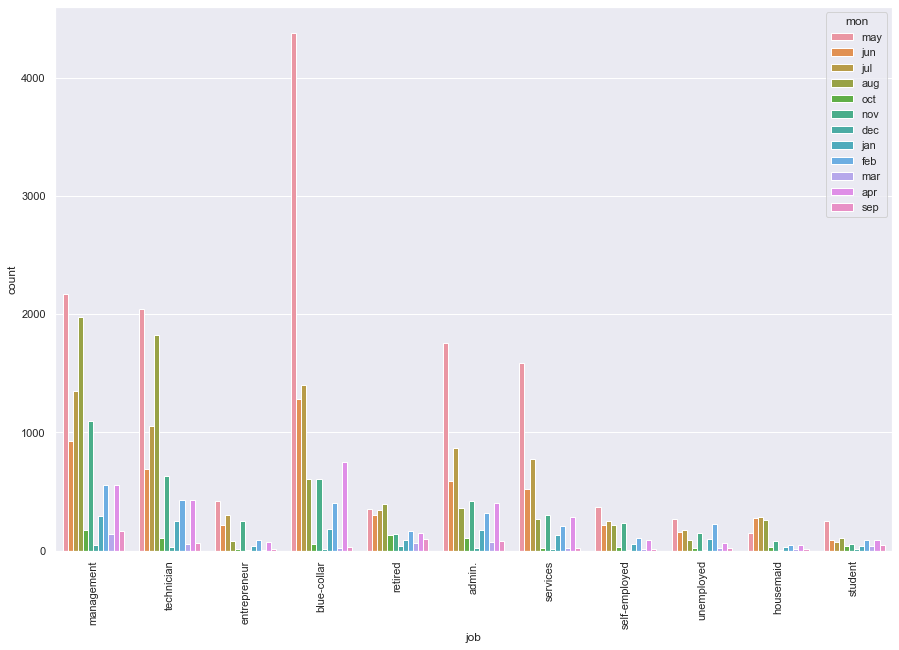

In [209]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='job',hue='mon',data=df)
pl.tick_params(axis='x',rotation=90)

In [210]:
#since both 'marital' and 'mon' has linear relation with job we fill the values of job column with respect to column 'marital' and 'mon'
df['job']=df.groupby(['marital','mon'])['job'].apply(lambda x:x.fillna(x.mode()[0]))


In [211]:
df['job'].isna().sum()

0

In [212]:
df['job'].value_counts()

blue-collar      9877
management       9591
technician       7598
admin.           5171
services         4154
retired          2273
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

# lets fill missing values in column 'education_qual '

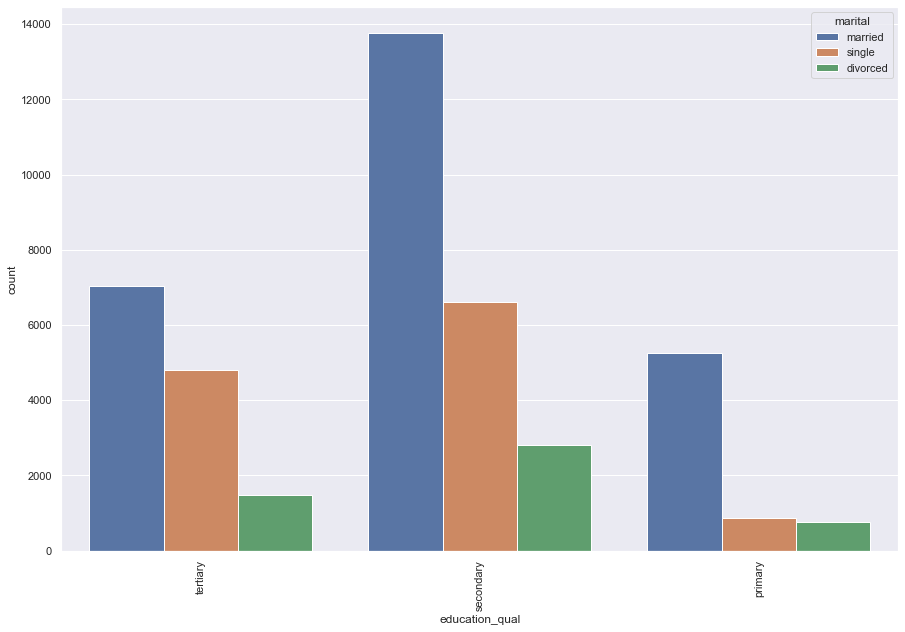

In [213]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='education_qual',hue='marital',data=df)
pl.tick_params(axis='x',rotation=90)


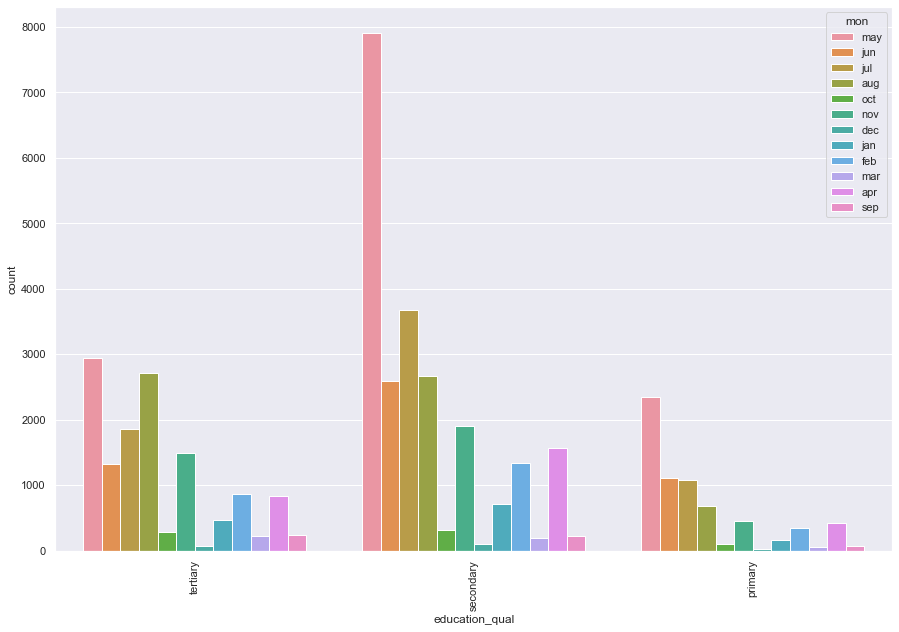

In [214]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='education_qual',hue='mon',data=df)
pl.tick_params(axis='x',rotation=90)

In [215]:
#since marital is linear related to column'education_qual'
df['education_qual']=df.groupby(['marital','mon'])['education_qual'].apply(lambda x:x.fillna(x.mode()[0]))
df['education_qual'].isna().sum()


0

In [216]:
df['education_qual'].value_counts()

secondary    24976
tertiary     13384
primary       6851
Name: education_qual, dtype: int64

In [217]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,NaN,5,may,261,1,NaN,no
1,44,technician,single,secondary,NaN,5,may,151,1,NaN,no
2,33,entrepreneur,married,secondary,NaN,5,may,76,1,NaN,no
3,47,blue-collar,married,secondary,NaN,5,may,92,1,NaN,no
4,33,blue-collar,single,secondary,NaN,5,may,198,1,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,NaN,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,NaN,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,NaN,no


# lets fill call_type column

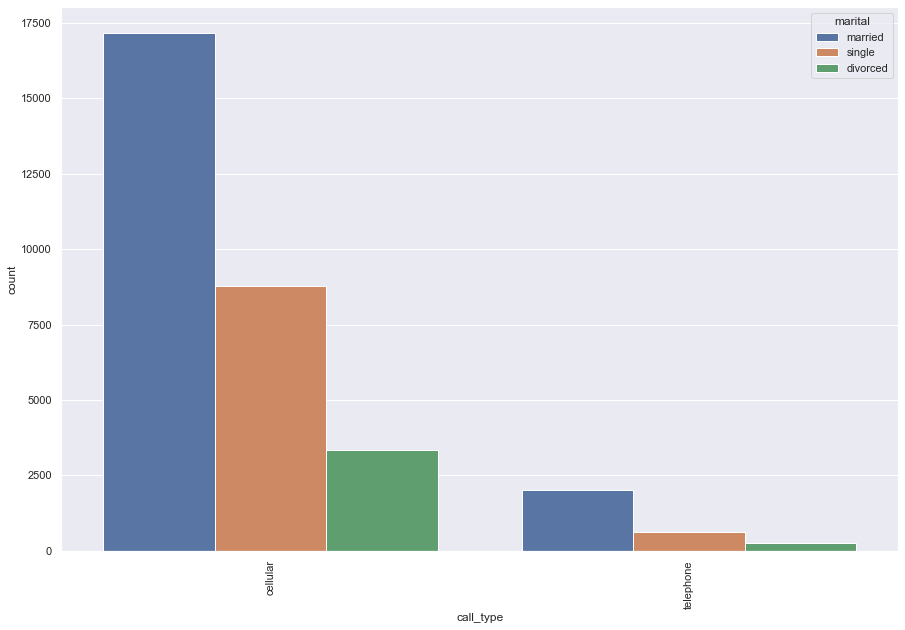

In [218]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='call_type',hue='marital',data=df)
pl.tick_params(axis='x',rotation=90)


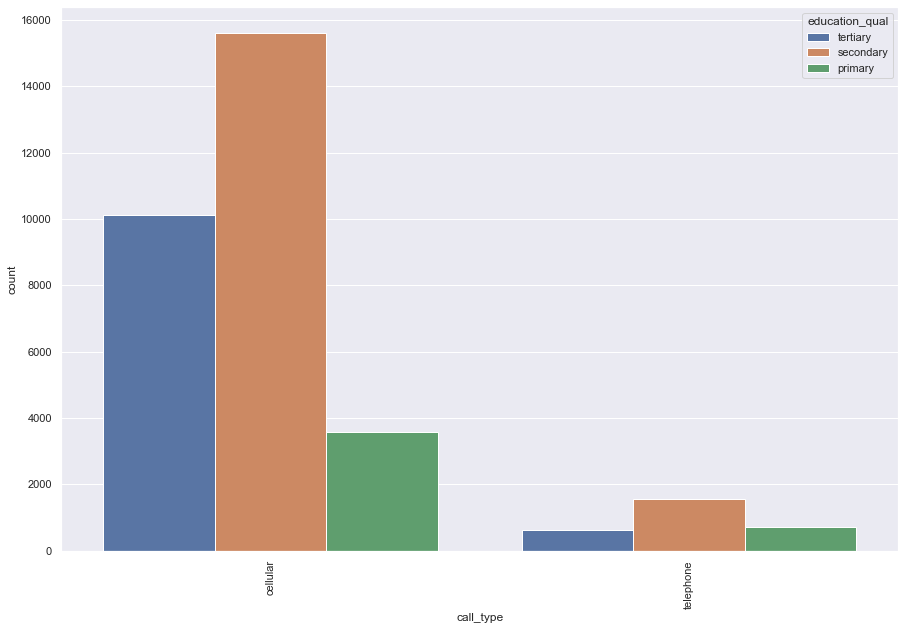

In [219]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='call_type',hue='education_qual',data=df)
pl.tick_params(axis='x',rotation=90)


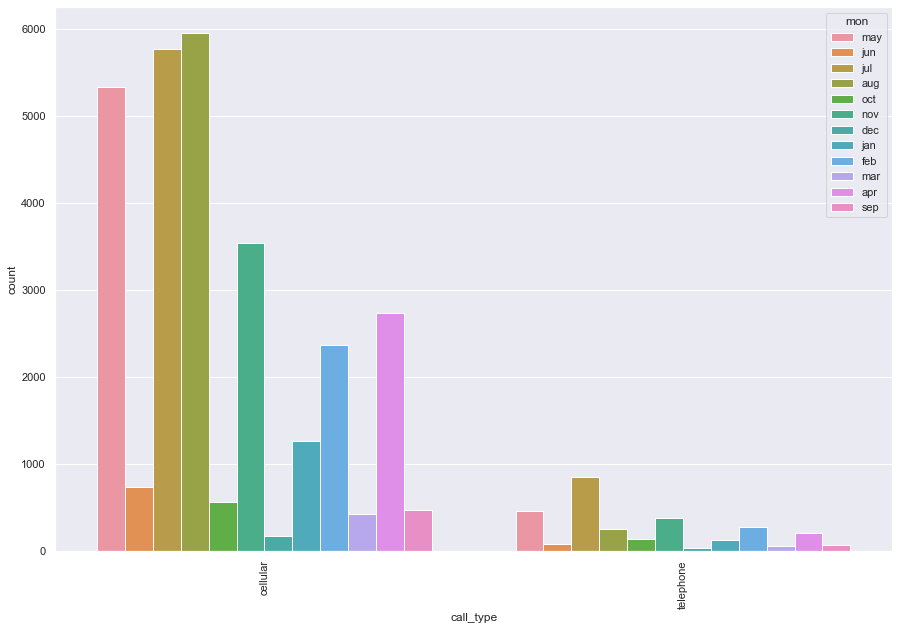

In [220]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='call_type',hue='mon',data=df)
pl.tick_params(axis='x',rotation=90)

In [221]:
#the call type has linear relationship with columns (marital,education_qual,mon)
df['call_type']=df.groupby(['marital','education_qual','mon'])['call_type'].apply(lambda x:x.fillna(x.mode()[0]))


In [222]:
df['call_type'].value_counts()

cellular     42305
telephone     2906
Name: call_type, dtype: int64

In [223]:
df['call_type'].isna().sum()

0

## now we fill the null values in column'prev_outcome'

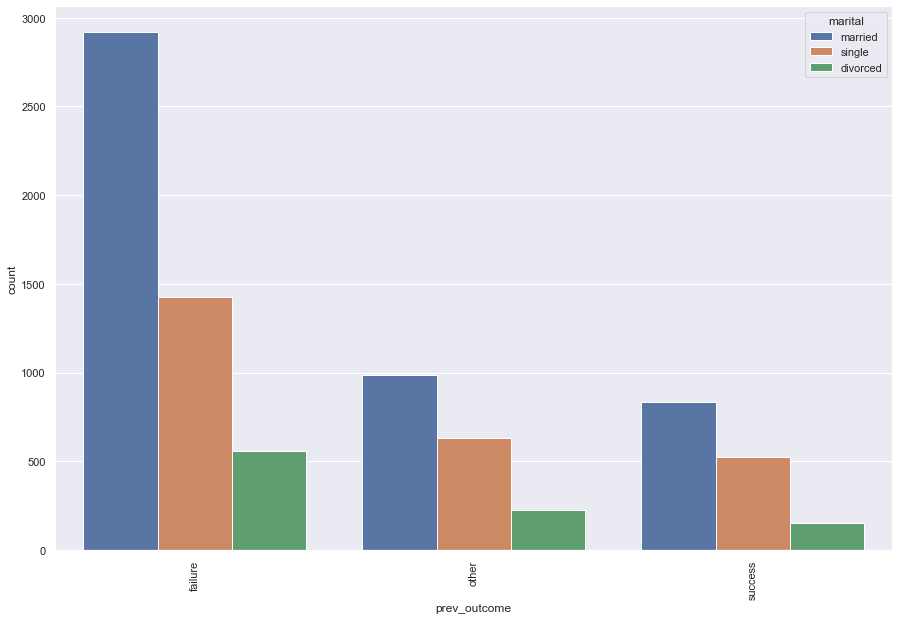

In [224]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='prev_outcome',hue='marital',data=df)
pl.tick_params(axis='x',rotation=90)


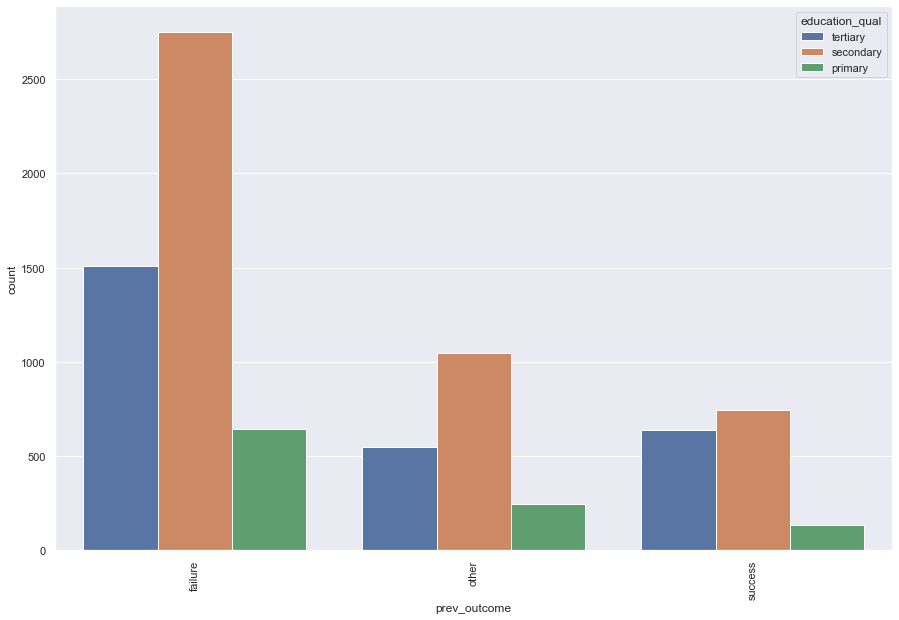

In [225]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='prev_outcome',hue='education_qual',data=df)
pl.tick_params(axis='x',rotation=90)


In [226]:
df['prev_outcome'].isna().sum()

36959

In [227]:
df['prev_outcome']=df.groupby(['marital','education_qual'])['prev_outcome'].apply(lambda x:x.fillna(x.mode()[0]))

In [228]:
df['prev_outcome']


0        failure
1        failure
2        failure
3        failure
4        failure
          ...   
45206    failure
45207    failure
45208    success
45209    failure
45210      other
Name: prev_outcome, Length: 45211, dtype: object

In [229]:
df['prev_outcome'].isna().sum()

0

In [230]:
df['prev_outcome'].value_counts()

failure    41860
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [231]:
df.info()#now every feature has full of nonnull values now we do outlier detection for numeric colomns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [232]:
#function for finding outliers
def box(x):
    return sns.boxplot(x,data=df)

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

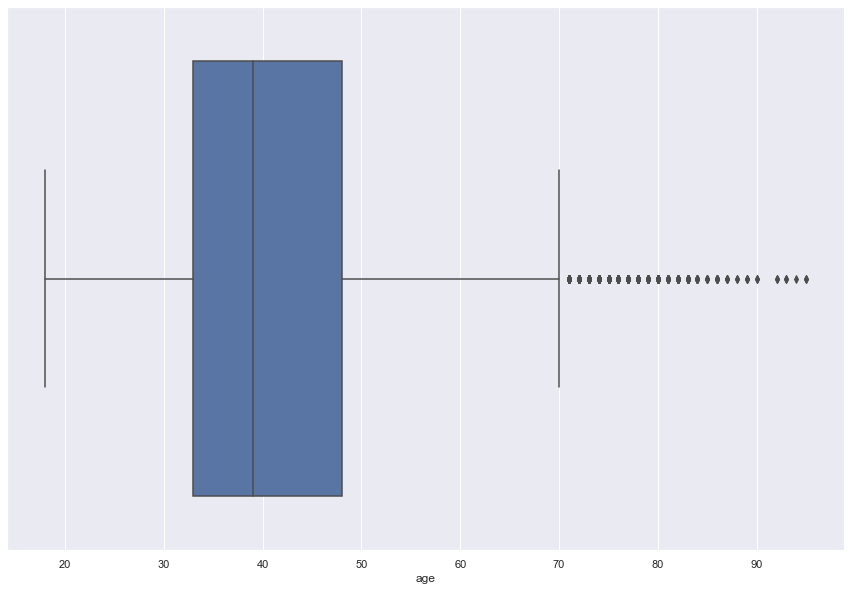

In [233]:
box('age')

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day'>

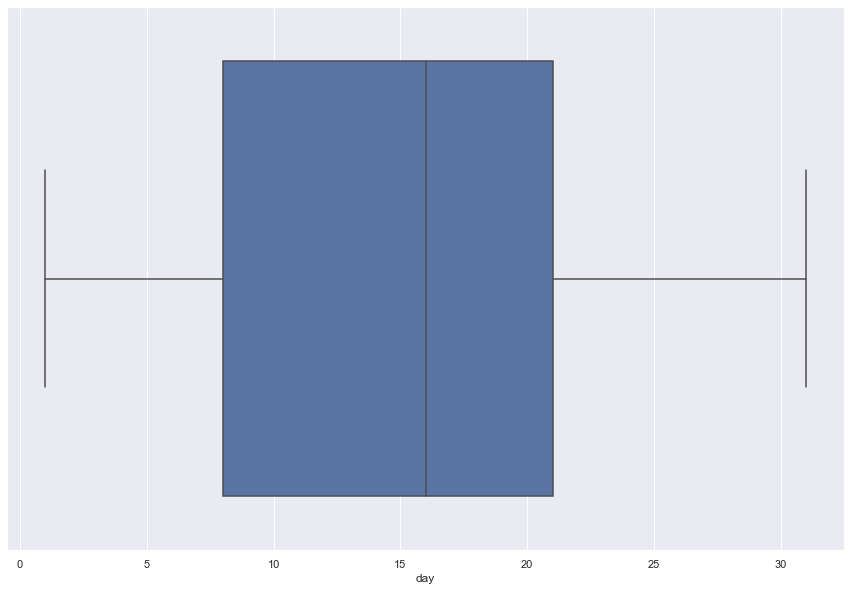

In [234]:
box('day')

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dur'>

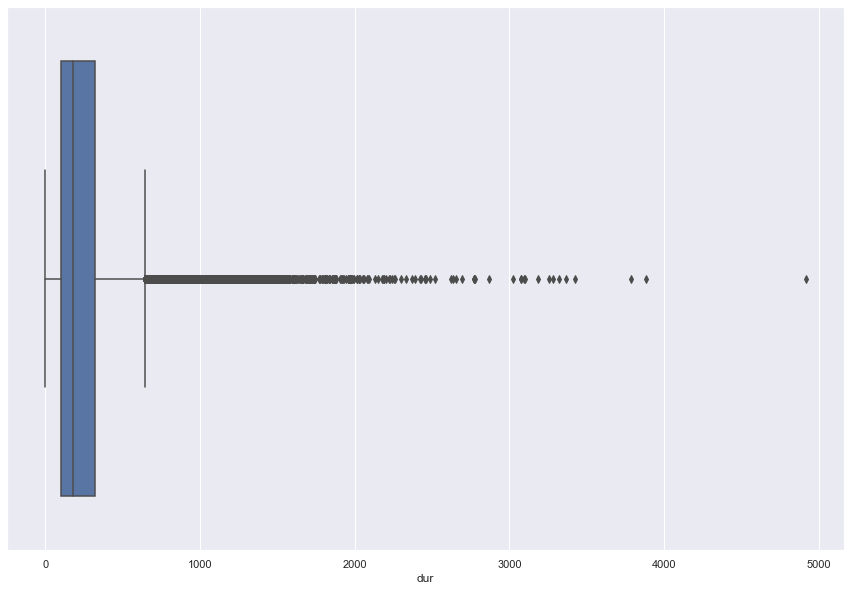

In [235]:
box('dur')

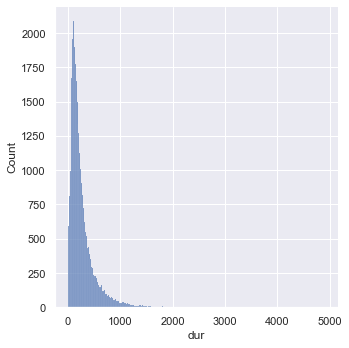

In [236]:
sns.displot(df['dur'])

In [237]:
df['dur'][df['dur']>1000].count()

1058

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_calls'>

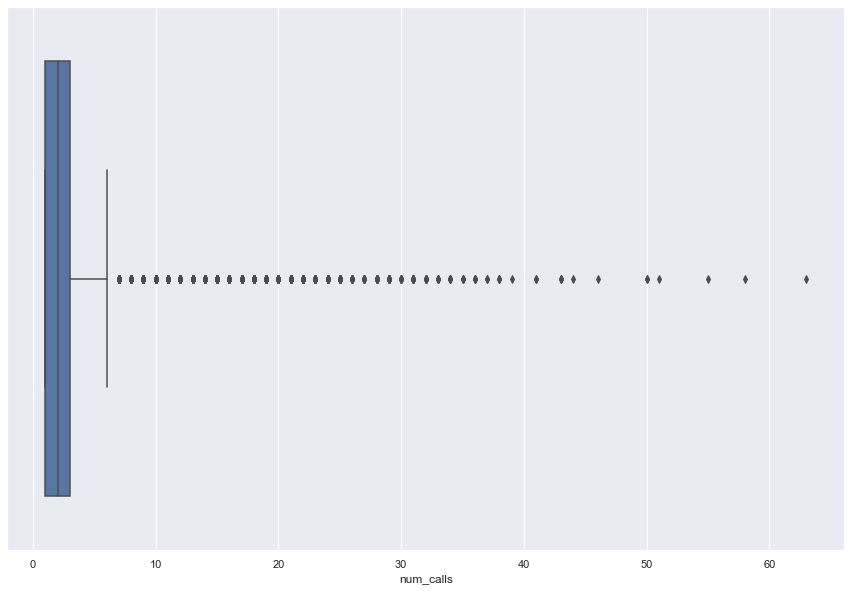

In [238]:
box('num_calls')

In [239]:
df['dur'].quantile(.75)

319.0

In [240]:
df['dur'].median()

180.0

In [247]:
def outimpt(x):
    q3=df[x].quantile(.75)
    q1=df[x].quantile(.25)
    iqr=q3-q1
    df[x][(df[x]>(q3+iqr))|(df[x]<(q1-iqr))]=df[x][(df[x]<=(q3+iqr)) & (df[x]>=(q1-iqr))].mean() 
    return df[x]

In [248]:
outimpt('age')

C:\Users\sakth\AppData\Local\Temp\ipykernel_6260\3489248710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][(df[x]>(q3+iqr))|(df[x]<(q1-iqr))]=df[x][(df[x]<=(q3+iqr)) & (df[x]>=(q1-iqr))].mean()


0        58.000000
1        44.000000
2        33.000000
3        47.000000
4        33.000000
           ...    
45206    51.000000
45207    40.310353
45208    40.310353
45209    57.000000
45210    37.000000
Name: age, Length: 45211, dtype: float64

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

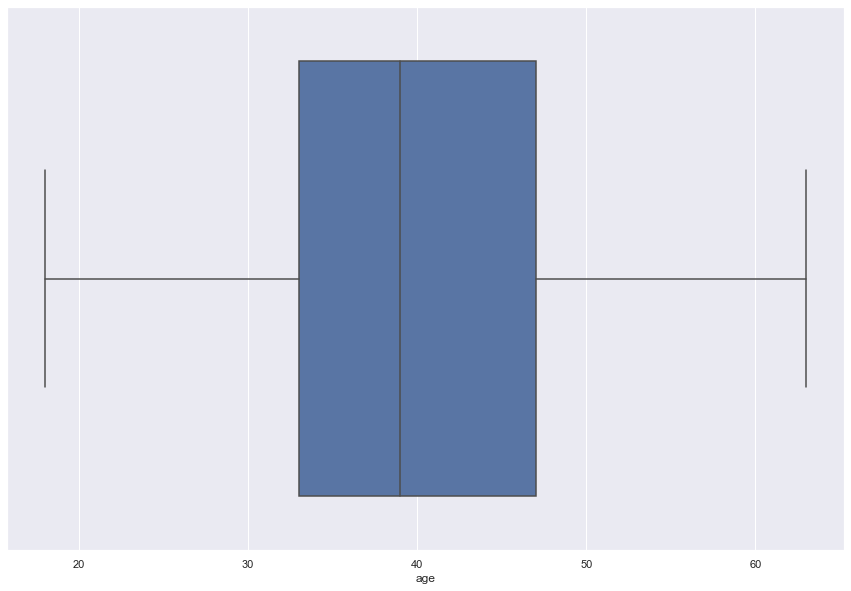

In [249]:
sns.boxplot(df['age'])

In [250]:
outimpt('dur')

C:\Users\sakth\AppData\Local\Temp\ipykernel_6260\3489248710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][(df[x]>(q3+iqr))|(df[x]<(q1-iqr))]=df[x][(df[x]<=(q3+iqr)) & (df[x]>=(q1-iqr))].mean()


0        261.000000
1        151.000000
2         76.000000
3         92.000000
4        198.000000
            ...    
45206    189.449905
45207    456.000000
45208    189.449905
45209    508.000000
45210    361.000000
Name: dur, Length: 45211, dtype: float64

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dur'>

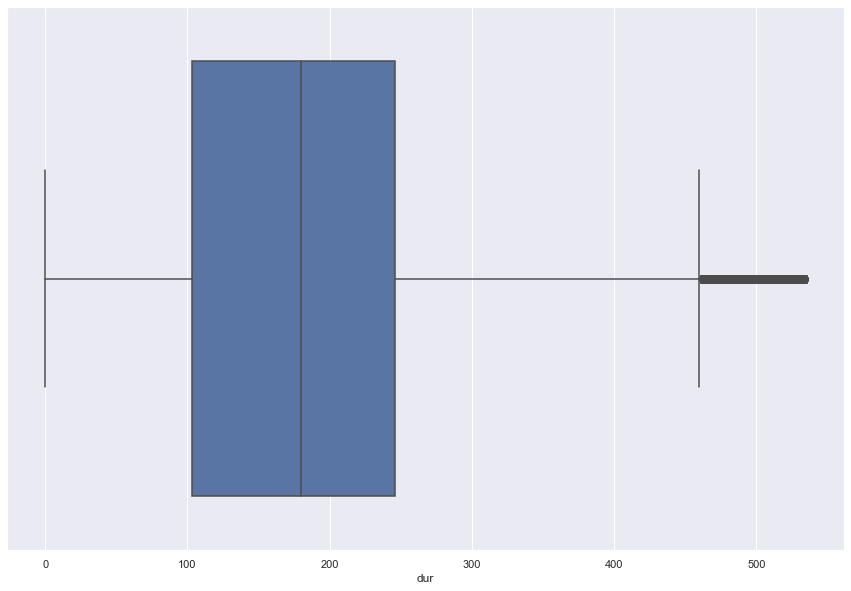

In [251]:
sns.boxplot(df['dur'])

In [252]:
outimpt('num_calls')

C:\Users\sakth\AppData\Local\Temp\ipykernel_6260\3489248710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][(df[x]>(q3+iqr))|(df[x]<(q1-iqr))]=df[x][(df[x]<=(q3+iqr)) & (df[x]>=(q1-iqr))].mean()


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
45206    3.0
45207    2.0
45208    5.0
45209    4.0
45210    2.0
Name: num_calls, Length: 45211, dtype: float64

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_calls'>

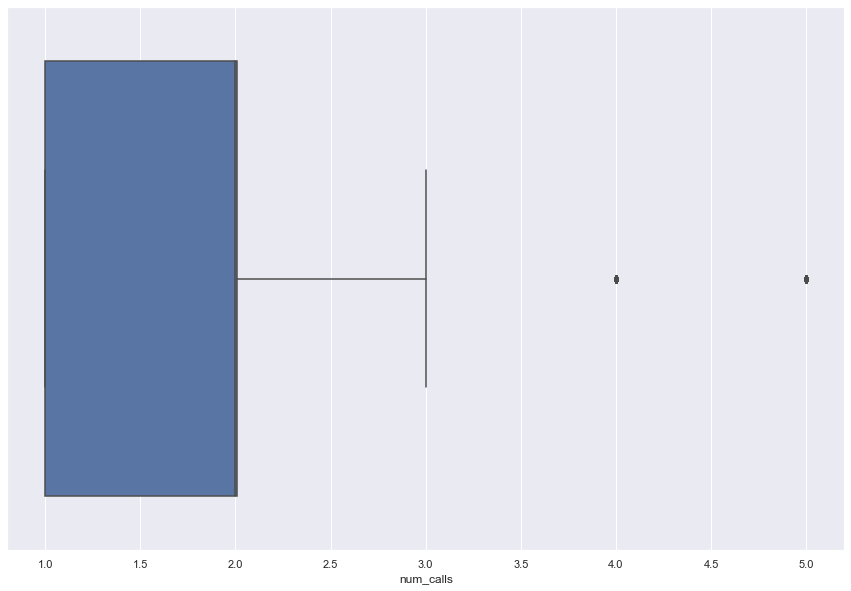

In [253]:
sns.boxplot(df['num_calls'])

## let we find relationship between the features and target

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45211 non-null  float64
 1   job             45211 non-null  object 
 2   marital         45211 non-null  object 
 3   education_qual  45211 non-null  object 
 4   call_type       45211 non-null  object 
 5   day             45211 non-null  int64  
 6   mon             45211 non-null  object 
 7   dur             45211 non-null  float64
 8   num_calls       45211 non-null  float64
 9   prev_outcome    45211 non-null  object 
 10  y               45211 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 3.8+ MB


C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='age'>

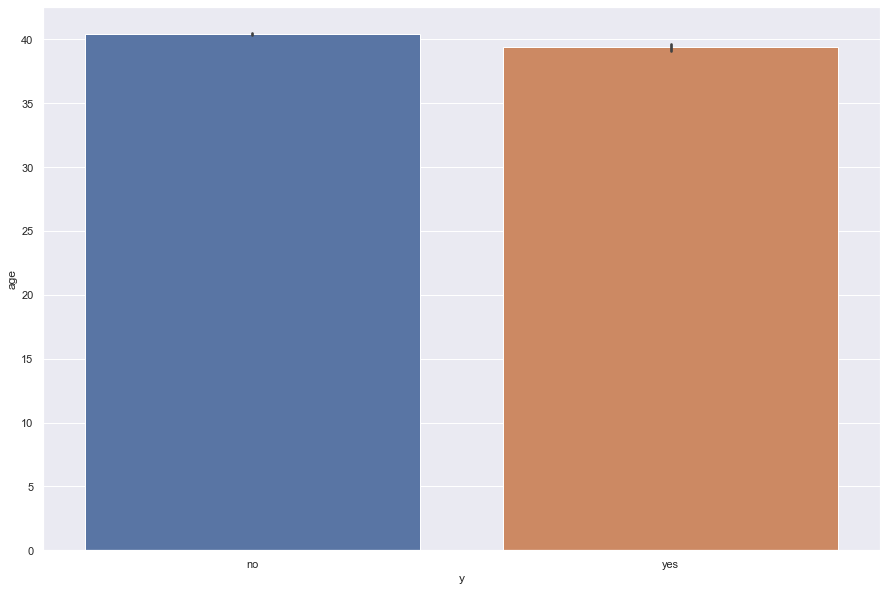

In [260]:
sns.barplot('y','age',data=df)

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='day'>

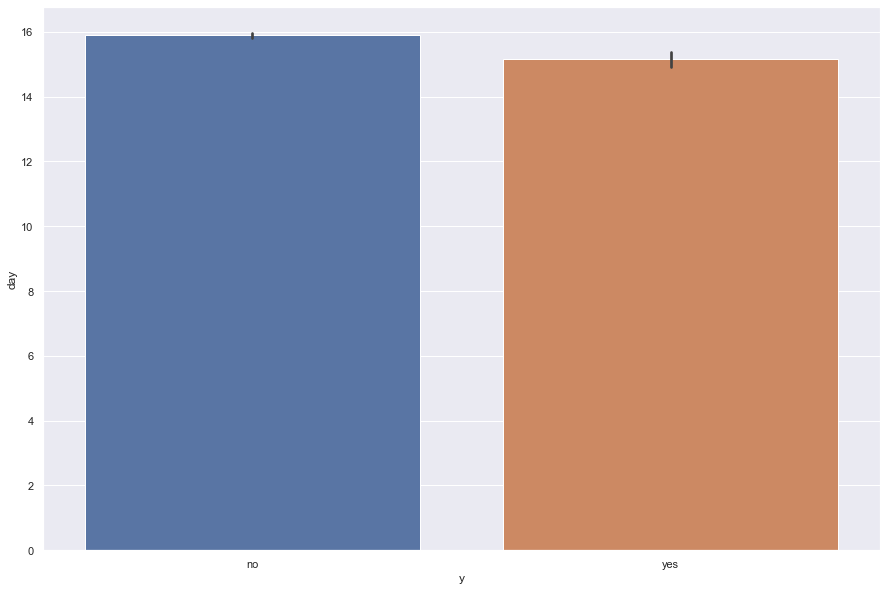

In [261]:
sns.barplot('y','day',data=df)

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='dur'>

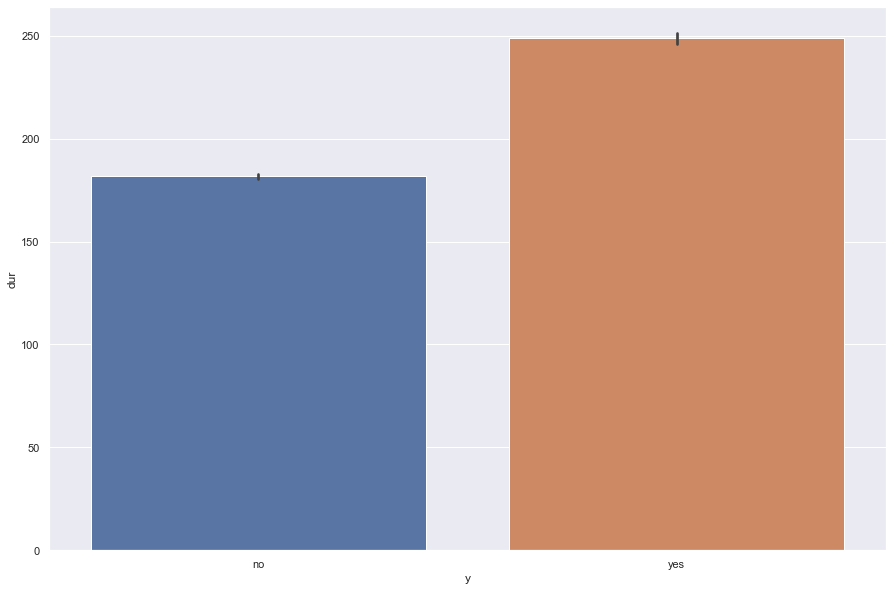

In [262]:
sns.barplot('y','dur',data=df)

# above graph shows linear relation between y and age,day,dur,so we use these feature


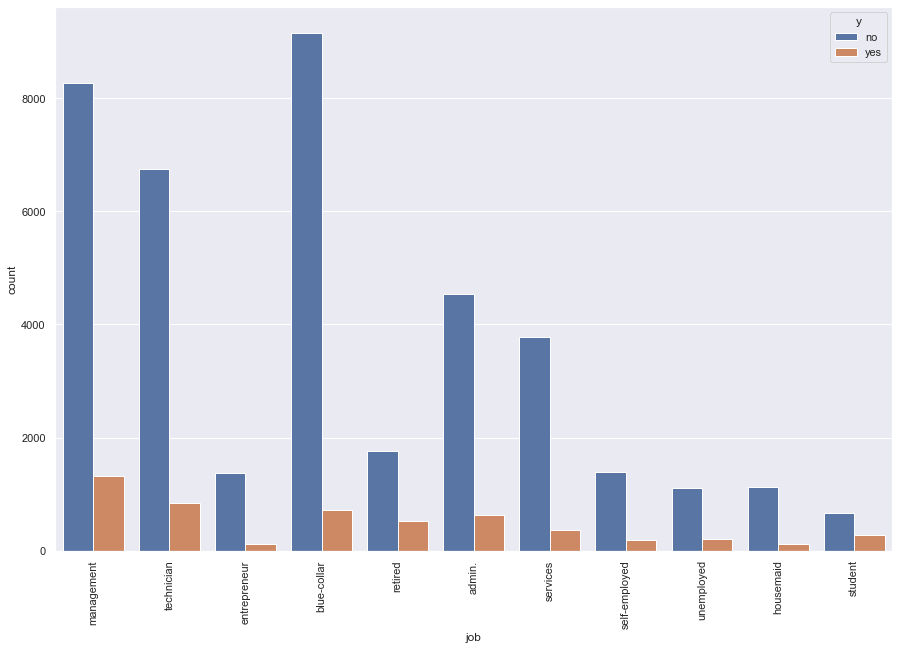

In [263]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='job',hue='y',data=df)
pl.tick_params(axis='x',rotation=90)



In [264]:
#since the relation here is not linear ,we use one hot encoding
df=pd.get_dummies(df,columns=['job'])
df

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58.000000,married,tertiary,cellular,5,may,261.000000,1.0,failure,no,...,0,0,0,1,0,0,0,0,0,0
1,44.000000,single,secondary,cellular,5,may,151.000000,1.0,failure,no,...,0,0,0,0,0,0,0,0,1,0
2,33.000000,married,secondary,cellular,5,may,76.000000,1.0,failure,no,...,0,1,0,0,0,0,0,0,0,0
3,47.000000,married,secondary,cellular,5,may,92.000000,1.0,failure,no,...,1,0,0,0,0,0,0,0,0,0
4,33.000000,single,secondary,cellular,5,may,198.000000,1.0,failure,no,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.000000,married,tertiary,cellular,17,nov,189.449905,3.0,failure,yes,...,0,0,0,0,0,0,0,0,1,0
45207,40.310353,divorced,primary,cellular,17,nov,456.000000,2.0,failure,yes,...,0,0,0,0,1,0,0,0,0,0
45208,40.310353,married,secondary,cellular,17,nov,189.449905,5.0,success,yes,...,0,0,0,0,1,0,0,0,0,0
45209,57.000000,married,secondary,telephone,17,nov,508.000000,4.0,failure,no,...,1,0,0,0,0,0,0,0,0,0


In [265]:
df.columns


Index(['age', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'prev_outcome', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed'],
      dtype='object')

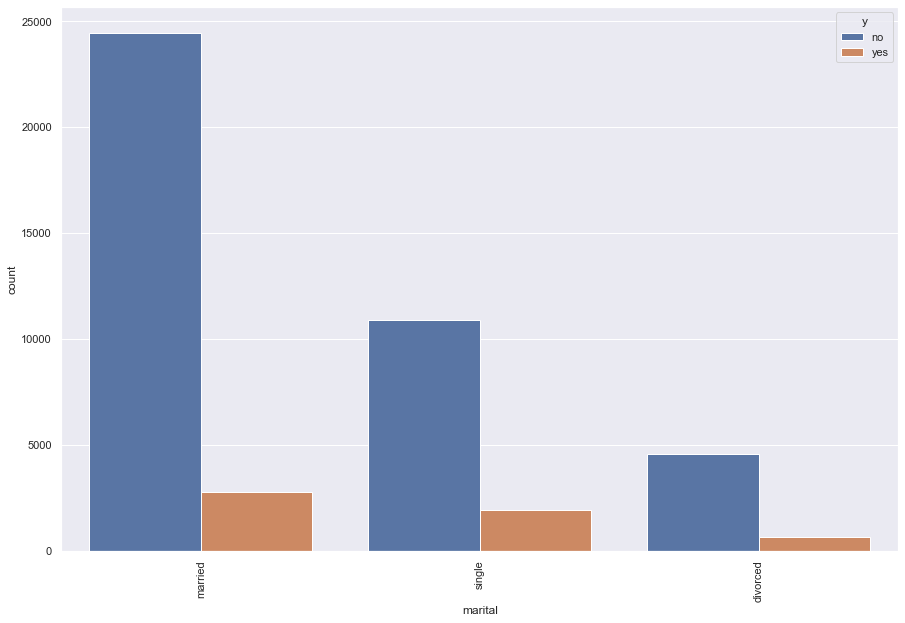

In [267]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='marital',hue='y',data=df)
pl.tick_params(axis='x',rotation=90)



In [268]:
#above graph shows linear relation between y and marital,so we label encoding
df['marital']=df['marital'].replace({'married':2,'single':1,'divorced':0})
df['marital']

0        2
1        1
2        2
3        2
4        1
        ..
45206    2
45207    0
45208    2
45209    2
45210    2
Name: marital, Length: 45211, dtype: int64

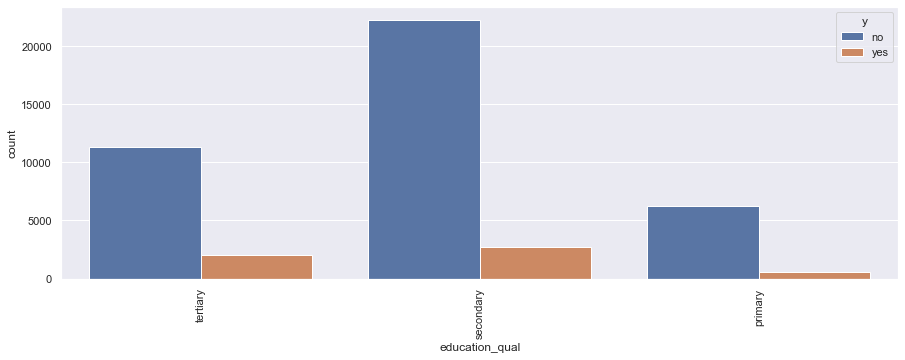

In [272]:
sns.set(rc={'figure.figsize':(15,5)})
pl=sns.countplot(x='education_qual',hue='y',data=df)
pl.tick_params(axis='x',rotation=90)



In [273]:
#above graph shows linear relation between y and 'education_qual',so we label encoding
df['education_qual']=df['education_qual'].replace({'secondary':2,'tertiary':1,'primary':0})
df['education_qual']

0        1
1        2
2        2
3        2
4        2
        ..
45206    1
45207    0
45208    2
45209    2
45210    2
Name: education_qual, Length: 45211, dtype: int64

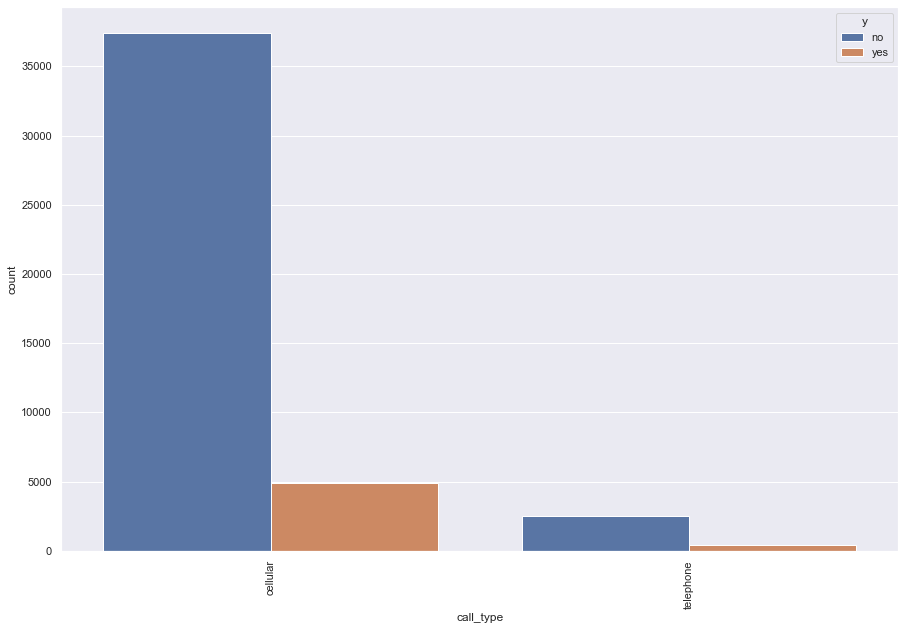

In [275]:
sns.set(rc={'figure.figsize':(15,10)})
pl=sns.countplot(x='call_type',hue='y',data=df)
pl.tick_params(axis='x',rotation=90)



In [276]:
#above graph shows linear relation between y and 'call_type',so we label encoding
df['call_type']=df['call_type'].replace({'cellular':1,'telephone':0})
df['call_type']

0        1
1        1
2        1
3        1
4        1
        ..
45206    1
45207    1
45208    1
45209    0
45210    1
Name: call_type, Length: 45211, dtype: int64

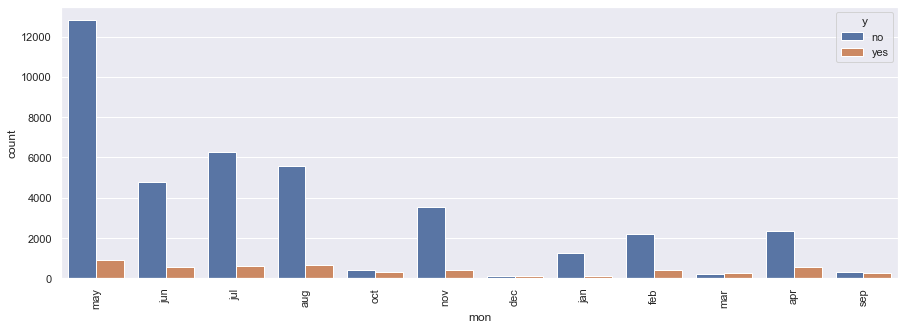

In [278]:
sns.set(rc={'figure.figsize':(15,5)})
pl=sns.countplot(x='mon',hue='y',data=df)
pl.tick_params(axis='x',rotation=90)


In [279]:
#above graph shows relation between y and 'mon' but not linear,so we do one hot encoding
df=pd.get_dummies(df,columns=['mon'])
df

,age,marital,education_qual,call_type,day,dur,num_calls,prev_outcome,y,job_admin.,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
0,58.000000,2,1,1,5,261.000000,1.0,failure,no,0,...,0,0,0,0,0,0,1,0,0,0
1,44.000000,1,2,1,5,151.000000,1.0,failure,no,0,...,0,0,0,0,0,0,1,0,0,0
2,33.000000,2,2,1,5,76.000000,1.0,failure,no,0,...,0,0,0,0,0,0,1,0,0,0
3,47.000000,2,2,1,5,92.000000,1.0,failure,no,0,...,0,0,0,0,0,0,1,0,0,0
4,33.000000,1,2,1,5,198.000000,1.0,failure,no,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.000000,2,1,1,17,189.449905,3.0,failure,yes,0,...,0,0,0,0,0,0,0,1,0,0
45207,40.310353,0,0,1,17,456.000000,2.0,failure,yes,0,...,0,0,0,0,0,0,0,1,0,0
45208,40.310353,2,2,1,17,189.449905,5.0,success,yes,0,...,0,0,0,0,0,0,0,1,0,0
45209,57.000000,2,2,0,17,508.000000,4.0,failure,no,0,...,0,0,0,0,0,0,0,1,0,0


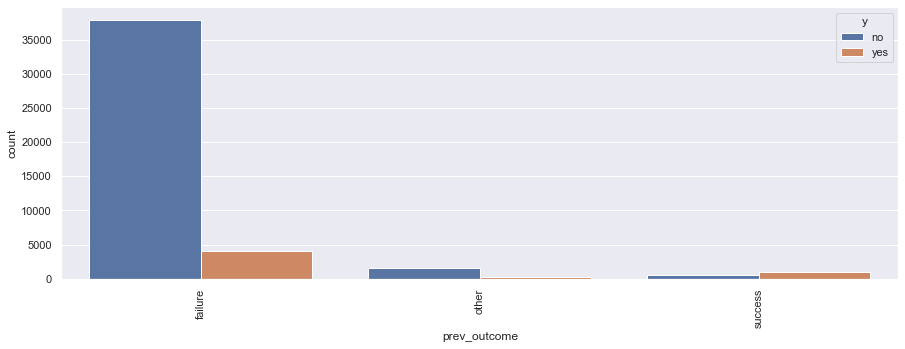

In [280]:
sns.set(rc={'figure.figsize':(15,5)})
pl=sns.countplot(x='prev_outcome',hue='y',data=df)
pl.tick_params(axis='x',rotation=90)



In [281]:
#above graph shows relation between y and 'prev_outcome' but not linear,so we do one hot encoding
df=pd.get_dummies(df,columns=['prev_outcome'])
df

,age,marital,education_qual,call_type,day,dur,num_calls,y,job_admin.,job_blue-collar,...,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success
0,58.000000,2,1,1,5,261.000000,1.0,no,0,0,...,0,0,0,1,0,0,0,1,0,0
1,44.000000,1,2,1,5,151.000000,1.0,no,0,0,...,0,0,0,1,0,0,0,1,0,0
2,33.000000,2,2,1,5,76.000000,1.0,no,0,0,...,0,0,0,1,0,0,0,1,0,0
3,47.000000,2,2,1,5,92.000000,1.0,no,0,1,...,0,0,0,1,0,0,0,1,0,0
4,33.000000,1,2,1,5,198.000000,1.0,no,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.000000,2,1,1,17,189.449905,3.0,yes,0,0,...,0,0,0,0,1,0,0,1,0,0
45207,40.310353,0,0,1,17,456.000000,2.0,yes,0,0,...,0,0,0,0,1,0,0,1,0,0
45208,40.310353,2,2,1,17,189.449905,5.0,yes,0,0,...,0,0,0,0,1,0,0,0,0,1
45209,57.000000,2,2,0,17,508.000000,4.0,no,0,1,...,0,0,0,0,1,0,0,1,0,0


In [282]:
df['y'].replace({'yes':1,'no':0},inplace=True)

In [283]:
df

,age,marital,education_qual,call_type,day,dur,num_calls,y,job_admin.,job_blue-collar,...,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success
0,58.000000,2,1,1,5,261.000000,1.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,44.000000,1,2,1,5,151.000000,1.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,33.000000,2,2,1,5,76.000000,1.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,47.000000,2,2,1,5,92.000000,1.0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,33.000000,1,2,1,5,198.000000,1.0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.000000,2,1,1,17,189.449905,3.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
45207,40.310353,0,0,1,17,456.000000,2.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
45208,40.310353,2,2,1,17,189.449905,5.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45209,57.000000,2,2,0,17,508.000000,4.0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [285]:
x=df.loc[:,df.columns!='y']
y=df['y']
x

,age,marital,education_qual,call_type,day,dur,num_calls,job_admin.,job_blue-collar,job_entrepreneur,...,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success
0,58.000000,2,1,1,5,261.000000,1.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,44.000000,1,2,1,5,151.000000,1.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,33.000000,2,2,1,5,76.000000,1.0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,47.000000,2,2,1,5,92.000000,1.0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,33.000000,1,2,1,5,198.000000,1.0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.000000,2,1,1,17,189.449905,3.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
45207,40.310353,0,0,1,17,456.000000,2.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
45208,40.310353,2,2,1,17,189.449905,5.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45209,57.000000,2,2,0,17,508.000000,4.0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [358]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1)

##### let we make the prediction using different models

In [288]:
#1.AdaboostClassifier()

In [290]:
kf=KFold(n_splits=10)
params={
       'n_estimators':[500,1000],
       'learning_rate':[.1,.01,.001],
       
       }
model=AdaBoostClassifier()
gv=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')
gv.fit(x_train,y_train)
ad1=gv.best_estimator_


In [291]:
accuracy_score(y_test,ad1.predict(x_test))

0.8979032115367601

In [295]:
ad1.feature_importances_

array([0.064, 0.014, 0.048, 0.004, 0.082, 0.412, 0.032, 0.004, 0.012,
       0.006, 0.   , 0.006, 0.022, 0.   , 0.004, 0.012, 0.   , 0.   ,
       0.024, 0.   , 0.016, 0.022, 0.012, 0.024, 0.   , 0.036, 0.044,
       0.   , 0.03 , 0.024, 0.018, 0.   , 0.028])

In [298]:
pd.DataFrame({'features':x.columns,'importance':ad1.feature_importances_}).sort_values(by='importance',ascending=False).reset_index(drop=True)

,features,importance
0,dur,0.412
1,day,0.082
2,age,0.064
3,education_qual,0.048
4,mon_may,0.044
5,mon_mar,0.036
6,num_calls,0.032
7,mon_oct,0.030
8,prev_outcome_success,0.028
9,mon_sep,0.024


In [294]:
#theAUROC for our model is
roc_auc_score(y_test,ad1.predict(x_test))

0.6181512547720273

In [ ]:
#2.RandomForestClassifier

In [303]:
kf=KFold(n_splits=10)
params={
       'criterion':['entropy'],
       'n_estimators':[500,1000],
       'max_depth':[5,10,15]
       
       }
model=RandomForestClassifier()
gv=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')
gv.fit(x_train,y_train)
rf=gv.best_estimator_


In [305]:
accuracy_score(y_test,rf.predict(x_test))

0.9005573741484562

In [306]:
#feature impotance
pd.DataFrame({'features':x.columns,'importance':rf.feature_importances_}).sort_values(by='importance',ascending=False).reset_index(drop=True)

,features,importance
0,dur,0.386216
1,day,0.089548
2,age,0.082142
3,prev_outcome_success,0.081139
4,prev_outcome_failure,0.048147
5,num_calls,0.036581
6,mon_oct,0.024548
7,mon_may,0.024427
8,mon_mar,0.022016
9,education_qual,0.021292


In [307]:
#AUROC
roc_auc_score(y_test,rf.predict(x_test))

0.6119895243416499

In [311]:
#3.Xgboostclassifier

In [312]:
kf=KFold(n_splits=10)
params=[{
       
       'n_estimators':[500,1000],
       'learning_rate':[.1,.001]
       
       
       }]
model=XGBClassifier()
gv=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')
gv.fit(x_train,y_train)
xg=gv.best_estimator_

In [313]:
accuracy_score(y_test,xg.predict(x_test))

0.8985225161461559

In [314]:
#feature importance
pd.DataFrame({'features':x.columns,'importance':xg.feature_importances_}).sort_values(by='importance',ascending=False).reset_index(drop=True)

,features,importance
0,prev_outcome_success,0.203035
1,mon_mar,0.068998
2,mon_oct,0.067775
3,mon_may,0.055860
4,mon_sep,0.048790
5,dur,0.041062
6,prev_outcome_failure,0.037829
7,mon_nov,0.034857
8,mon_jan,0.034177
9,mon_feb,0.032075


In [315]:
#AUROC
roc_auc_score(y_test,rf.predict(x_test))

0.6119895243416499

### Let we use SMOTE oversampling techniques and check whether it helps for getting more accuracy or not

In [340]:

ov=SMOTE(sampling_strategy=1)
x_train1,y_train1=ov.fit_resample(x_train,y_train)
counte=Counter(y_train1)
print(counte)

Counter({0: 29924, 1: 29924})


In [341]:
#1.AdaBoostClassifier

In [342]:
kf=KFold(n_splits=10)
params={
       'n_estimators':[500,600],
       'learning_rate':[.1,.01,.2],
       
       }
model=AdaBoostClassifier()
gv=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')
gv.fit(x_train1,y_train1)
ad2=gv.best_estimator_
accuracy_score(y_test,ad2.predict(x_test))

0.8934796071839335

In [343]:
#AUROC
roc_auc_score(y_test,ad2.predict(x_test))

0.7119258334425506

In [351]:
#feature importance
pd.DataFrame({'features':x.columns,'importance':ad2.feature_importances_}).sort_values(by='importance',ascending=False).reset_index(drop=True)

,features,importance
0,num_calls,0.163333
1,dur,0.126667
2,job_management,0.055000
3,mon_may,0.051667
4,job_blue-collar,0.048333
5,job_technician,0.045000
6,mon_jul,0.038333
7,job_admin.,0.038333
8,job_services,0.033333
9,mon_aug,0.031667


In [345]:
#2.Randomforest classifier

In [346]:
kf=KFold(n_splits=10)
params={
       'criterion':['entropy'],
       'n_estimators':[500,600],
       'max_depth':[10,15,20]
       
       }
model=RandomForestClassifier()
gv=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')
gv.fit(x_train,y_train)
rf1=gv.best_estimator_
accuracy_score(y_test,rf1.predict(x_test))

0.8998495974520039

In [347]:
#AUROC
roc_auc_score(y_test,rf1.predict(x_test))

0.6339092722759111

In [352]:
#feature importance
pd.DataFrame({'features':x.columns,'importance':rf1.feature_importances_}).sort_values(by='importance',ascending=False).reset_index(drop=True)

,features,importance
0,dur,0.344202
1,day,0.119272
2,age,0.114729
3,prev_outcome_success,0.056535
4,num_calls,0.046313
5,prev_outcome_failure,0.033943
6,education_qual,0.027258
7,marital,0.025991
8,mon_may,0.019671
9,mon_oct,0.018706


In [348]:
#3.XGboostClassifier

In [349]:
kf=KFold(n_splits=10)
params=[{
       
       'n_estimators':[500,600],
       'learning_rate':[.1,.2]
       
       
       }]
model=XGBClassifier()
gv=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')
gv.fit(x_train,y_train)
xg1=gv.best_estimator_
accuracy_score(y_test,xg1.predict(x_test))

0.8985225161461559

In [350]:
#AUROC
roc_auc_score(y_test,xg1.predict(x_test))

0.682129491032306

In [353]:
#feature importance
pd.DataFrame({'features':x.columns,'importance':xg1.feature_importances_}).sort_values(by='importance',ascending=False).reset_index(drop=True)

,features,importance
0,prev_outcome_success,0.203035
1,mon_mar,0.068998
2,mon_oct,0.067775
3,mon_may,0.055860
4,mon_sep,0.048790
5,dur,0.041062
6,prev_outcome_failure,0.037829
7,mon_nov,0.034857
8,mon_jan,0.034177
9,mon_feb,0.032075


In [ ]:
#After doing oversampling also we didnot get better accuracy  than without oversampling,but the roc_auc_score has increased after the oversampling by SMOTE()

In [362]:
#The best model for this Data prection is
rf
#with accuracy 0.9005573741484562


RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=500)